## 5 year relative survival of brain cancer

#### Pentek Tamas

#### Podaru Bogdan

### Introduction

The problem adressed by this article refers to the 5 year relative survival of patients diagnosed with brain tumors.
A brain tumor occurs when abnormal cells form within the brain. There are two main types of tumors: cancerous (malignant) and benign (non-cancerous). The most common primary brain tumors are: Gliomas (50.4%), Meningiomas (20.8%) [[1](#ref)]. There are six main categories in the summary staging system : unstaged/unknown(cases for which sufficient evidence is not available ), localized(malignancy limited to organ of origin), regional(tumor extension beyond the limits of the organ of origin), distant(tumor cells have broken away from the primary tumor, traveled to other part of the body, and started to grow at the new location), all(patient presents all the stages described).
The survival statistics used in this study were obtained from SEER 18, which includes malignant data from 18 central cancer registries that represent approximately 28% of the US population. [[2](#ref)]
    
   [[3](#ref)] Number of new cases per 100.000 persons by Race/Ethnicity & Sex: 

|  | Male | Female |
| --- | --- | --- |
| White | 8.3 | 6 |
| Black | 4.7 | 3.3 |

US population in 2009: 306.8 millions<br>
US population in 2015: 321 millions<br>
Average US population between these two years: 313.9 millions<br>
Based on [[3](#ref)] we have computed the number of white men implied in this study: At every 8.3 persons/100.000 a new case of a white male having brain cancer appears. So there are 313.9 millions/100.000*8.3 = 26053.7 white males. Similar the categories of female, black and white are obtained by the same logic. Last step is to normalize these values. Final values: 

  | Male | Female |
| --- | --- |
| 0.684211 | 0.315789 |

  | Black | White |
| --- | --- |
| 0.358744 | 0.641256 |

Values for age and stage were normalized after getting them from [[4](#ref)]. 
Some values for cancer recurrence based on stage of diagnosis we found on [[6](#ref)] : 'localized': 17% and 'distant': 22%. The values for the other stages('all', 'unstaged', 'regional') we didn't find so we used some fictive numbers based on real numbers. These numbers were also normalized.
Values for treatment based on stage we didn't find so the chosen values are proportional with medical decisions ( in early stages patients mostly face radiotherapy treatment and severe cases are treated with surgery). For stage 'all' the value of surgery is the highest as it is the most appropriate method for such cases. The chosen values can be found in the probability table.
Values for risk of brain cancer we found on: [[7](#ref)] for family history, [[5](#ref)] for mobile usage and processed meat and [[8](#ref)] for smoking. Because risk depends on gender we considered half of them represents men. The values after normalization can be found in the probability table.

First, we import the modules we need:

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy

from pomegranate import *

numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

%load_ext watermark
%watermark -m -n -p numpy,scipy,pomegranate

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Tue Apr 07 2020 

numpy 1.18.2
scipy 1.4.1
pomegranate 0.11.1

compiler   : GCC 7.3.0
system     : Linux
release    : 5.3.0-28-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 1
interpreter: 64bit


### Network architecture

Now, we start building the network:

In [17]:
# Unconditional distribution
Gender = DiscreteDistribution({ "Male":0.684, "Female": 0.316 })
Skin_color = DiscreteDistribution({ "Black":0.3587, "White": 0.6413 })

In [18]:
# Conditional distribution for the network 

Risk_of_brain_cancer = ConditionalProbabilityTable([["Male","Family history", 0.1019],
                                                   ["Female","Family history", 0.0877],
                                                   ["Male","Processed meat", 0.6527],
                                                   ["Female","Processed meat", 0.5614],
                                                   ["Male","Smoking", 0.2446],
                                                   ["Female","Smoking", 0.3508],
                                                   ["Male","Mobile Usage", 0.0008],
                                                   ["Female","Mobile Usage", 0.0001]], [Gender])

Age = ConditionalProbabilityTable([["Male","Black","<45", 0.508],
                                   ["Male","Black","45-54", 0.2104],
                                   ["Male","Black","55-64", 0.1024],
                                   ["Male","Black","65-74", 0.0872],
                                   ["Male","Black","75+", 0.092],

                                   ["Male","White","<45", 0.5553],
                                   ["Male","White","45-54", 0.2387],
                                   ["Male","White","55-64", 0.1132],
                                   ["Male","White","65-74", 0.059],
                                   ["Male","White","75+", 0.0338],

                                   ["Female","Black","<45", 0.4835],
                                   ["Female","Black","45-54", 0.2319],
                                   ["Female","Black","55-64", 0.1667],
                                   ["Female","Black","65-74", 0.0515],
                                   ["Female","Black","75+", 0.0664],

                                   ["Female","White","<45", 0.513],
                                   ["Female","White","45-54", 0.2607],
                                   ["Female","White","55-64", 0.1215],
                                   ["Female","White","65-74", 0.0777],
                                   ["Female","White","75+", 0.0271]], [Gender,Skin_color])
                                                   
Stage = ConditionalProbabilityTable([["Male","Black","All", 0.2106],
                                   ["Male","Black","Localized", 0.2254],
                                   ["Male","Black","Regional", 0.1164],
                                   ["Male","Black","Distant", 0.226],
                                   ["Male","Black","Unstaged", 0.2216],

                                   ["Male","White","All", 0.2258],
                                   ["Male","White","Localized", 0.2451],
                                   ["Male","White","Regional", 0.1389],
                                   ["Male","White","Distant", 0.2072],
                                   ["Male","White","Unstaged", 0.183],

                                   ["Female","Black","All", 0.1979],
                                   ["Female","Black","Localized", 0.2043],
                                   ["Female","Black","Regional", 0.1533],
                                   ["Female","Black","Distant", 0.2229],
                                   ["Female","Black","Unstaged", 0.2216],

                                   ["Female","White","All", 0.2207],
                                   ["Female","White","Localized", 0.2412],
                                   ["Female","White","Regional", 0.1308],
                                   ["Female","White","Distant", 0.2333],
                                   ["Female","White","Unstaged", 0.174]], [Gender,Skin_color])  
                                                   
Treatment = ConditionalProbabilityTable([["All","Surgery", 0.85],
                                       ["All","Radiotherapy", 0.15],
                                       ["Localized","Surgery", 0.1],
                                       ["Localized","Radiotherapy", 0.9],
                                       ["Regional","Surgery", 0.25],
                                       ["Regional","Radiotherapy", 0.75],
                                       ["Distant","Surgery", 0.4],
                                       ["Distant","Radiotherapy", 0.6],
                                       ["Unstaged","Surgery", 0.2],
                                       ["Unstaged","Radiotherapy", 0.8]], [Stage])

Recurrence = ConditionalProbabilityTable([["All",'T', 0.5586],
                                       ["All",'F', 0.4414],
                                       ["Localized",'T', 0.0949],
                                       ["Localized",'F', 0.9051],
                                       ["Regional",'T', 0.1061],
                                       ["Regional",'F', 0.8939],
                                       ["Distant",'T', 0.1229],
                                       ["Distant",'F', 0.8771],
                                       ["Unstaged",'T', 0.1173],
                                       ["Unstaged",'F', 0.8827]], [Stage])  


The network has 7 nodes corresponding to 7 states each of which with the following domains:
1. Gender : {Male, Female}
2. Skin color : {Black, White}
3. Risk of brain cancer : {Family history, Processed meat, Smoking, Mobile usage}
4. By Age : {<45, 45-54, 55-64, 65-74, 75+} - age categories
5. By Stage : {All, Localized, Regional, Distant, Unstaged}
6. Treatment : {Surgery, Radiotherapy}
7. Recurrence : {T, F} - the cancer is reccurent or not

In [19]:
# Create network states
gen = State(Gender, name="Gender")
skin = State(Skin_color, name="Skin color")
risk = State(Risk_of_brain_cancer, name="Risk of brain cancer")
age = State(Age, name="By Age")
stage = State(Stage, name="By Stage")
treatment = State(Treatment, name="Treatment")
recurrence = State(Recurrence, name="Recurrence")


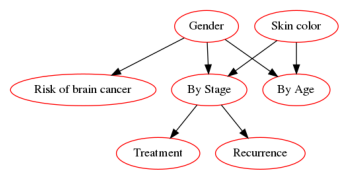

In [20]:
# Create the Bayesian network object

model = BayesianNetwork("5 year survival")

# Add the states to the network 
model.add_states(gen,skin,risk,age,stage,treatment,recurrence)

# Connect the states
model.add_edge(gen, risk)
model.add_edge(gen, age)
model.add_edge(gen, stage)
model.add_edge(skin, age)
model.add_edge(skin, stage)
model.add_edge(stage, treatment)
model.add_edge(stage, recurrence)

# Integrate everything
model.bake()

#Draw the network
model.plot()

### Arc presence/absence analysis
- Why there is no link between 'Recurrence' node and 'By Age' node (or 'Geneder' or 'Skin color')?
<br>
If a person was diagnosed in some stage the only important information for deciding if the tumor will return becomes the type of stage. For a cancer to return there should be actual cancer diagnosis whether the pacient is a man or a woman and of any age. For example there is no point for a cancer to return if a male patient aged 35 was not diagnosed as having cancer.
By the same logic the only relevant information for deciding the treatment is the stage of diagnosis.
- But why there is a link between 'Gender' and 'Risk of brain cancer' ?
<br> 
The domain of 'Risk of brain cancer' node is represented by the values : smoking, family history, mobile usage and processed meat. Articles highlight the fact that consumption of processed meat and cigarettes are higher at man ([[5](#ref)] and [[8](#ref)]). So there is a direct influence of gender in the risk rates.
- Why there is no link between the nodes 'By Stage' and 'By Age'?
<br> 
The bayesian network described above gives 2 different general answers about 5 year relative survival in relation with gender and skin color: one analysis by stage of diagnosis and another distinct one by age of the patients as described in [[4](#ref)] . Only these 2 nodes are referring to 5 year relative survival and the other nodes answer questions about cancer recurrence, type of treatment, risk rates of different factors, et al.
    

The above graph has the following marginal probabilities for each variable in the graph:

In [21]:
model.marginal()

array([{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Male" :0.6839999999999998,
            "Female" :0.31600000000000034
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Black" :0.35870000000000013,
            "White" :0.6412999999999999
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Processed meat" :0.6238491999999997,
            "Family history" :0.09741280000000015,
            "Smoking" :0.27815919999999994,
            "Mobile Usage" :0.0005788000000002214
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "45-54" :0.23

### Interrogate the net:

The probability of brain cancer recurrence of a white colored man diagnosed in localized stage.

In [22]:
model.probability(["Male","White",None,None,"Localized",None,'T'])

0.010202976005508

The probability of brain cancer recurrence of a white colored man who was cured after all stages.

In [23]:
model.probability(["Male","White",None,None,"All",None,'T'])

0.05532764825649601

The probability to relative 5 year survival of people under 45.

In [24]:
model.probability(["Male","White",None,"<45",None,None,None]) + model.probability(["Male","Black",None,"<45",None,None,None])+model.probability(["Female","White",None,"<45",None,None,None])+model.probability(["Female","Black",None,"<45",None,None,None])

0.52698430576

The probability of a 58 years black woman to be cured from brain cancer after going through all stages using surgery.

In [25]:
model.probability(["Female","Black",None,"55-64","All","Surgery",None])

0.0031784748475225983

The probability of a 58 years black woman to be cured from brain cancer after going through all stages using radiotherapy.

In [26]:
model.probability(["Female","Black",None,"55-64","All","Radiotherapy",None])

0.0005609073260333999

As seen above the latter probability is lower because if someone has an all stage brain cancer there are lower chances for her to be cured using radiotherapy (the preferred method is surgery). 

In [27]:
model.probability(["Male",None,"Smoking",None,None,None,None]) + model.probability(["Female",None,"Smoking",None,None,None,None])

0.2781592

In [28]:
model.probability(["Male",None,"Mobile Usage",None,None,None,None]) + model.probability(["Female",None,"Mobile Usage",None,None,None,None])

0.0005788000000000002

Last two probabilities compare the influence of smoking and mobile usage in contrast.


Let's take a simple one: Compare the risks of a black man(age < 45, unstaged) to contact brain cancer.

In [29]:
data = model.predict_proba(["Male","Black",None,"<45","Unstaged",None,None])
print(data[2])

{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Processed meat" :0.6526999999999997,
            "Family history" :0.10190000000000016,
            "Smoking" :0.24460000000000004,
            "Mobile Usage" :0.0008000000000002216
        }
    ],
    "frozen" :false
}


What are the probabilities for recurrence and risks given the following statement?

In [30]:
model.predict_proba(["Female","White",None,"55-64","Regional","Radiotherapy",None])

array(['Female', 'White',
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Processed meat" :0.5613999999999998,
            "Family history" :0.08770000000000011,
            "Smoking" :0.35079999999999995,
            "Mobile Usage" :0.00010000000000022205
        }
    ],
    "frozen" :false
},
       '55-64', 'Regional', 'Radiotherapy',
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "F" :0.8938999999999998,
            "T" :0.1061000000000002
        }
    ],
    "frozen" :false
}], dtype=object)

As you can see the results are in relation with the studies: processed meat has the biggest impact in health and because the cancer developed as 'regional' there are lower chances for it to return.

What was the most suitable treatement for an 80 year old person diagnosed with all stages.

In [31]:
data = model.predict_proba({'By Age':'75+','By Stage':'All'})
# Find the key with the maximum value
inverse = [(value, key) for key, value in data[5].items()]
print(max(inverse)[1])

Surgery


What is the lowest risk factor for contacting brain cancer?

In [32]:
data = model.predict_proba({})
# Find the key with the maximum value
inverse = [(value, key) for key, value in data[2].items()]
print("From ",data[2].keys(),":", min(inverse)[1])

From  ('Processed meat', 'Family history', 'Smoking', 'Mobile Usage') : Mobile Usage


### Conclusion

In conclusion we can say that the network is general enough to address major categories like treatment, recurrence, risk factors and 5 year relative survival in case of a brain cancer diagnosis. Interesting results were obtained from the network like the high value of recurrence in case of seniors diagnosed in all stages phase, probability of 5 year survival for persons under 45 in contrast with persons above 75, how radiotherapy gave inferior results when someone was diagnosed in all stage phase (better results are obtained with surgery). As seen above the cigarettes' influence is higher in contacting brain tumors in contrast with mobile usage (<0.1%) so better choose the mobile phone rather than the cigarette.

### Possible improvements

The biggest limit of the network is linked to the 5 year survival inference. The specificity is given by the results obtained in term of the 5 year survival. Because of this, making inferences after this period of 5 years is inappropriate.
Firstly we will extend the domains of some states, for example Chemotherapy, Natural treatements could be added as alternatives for treatement; more risk factors like alcohol, immune system, fruits and vegetables consumption, rays, hormonal factors or environmental factors. The network architecture can be extended by adding new nodes that model price of treatements, influence of other diseases, electromagnetic waves influence, overall satisfaction of medical services, symptoms, how often the patient has his/her medical evaluations, et al.


### References 
<a id="ref"></a>
[1] <a>https://en.wikipedia.org/wiki/Brain_tumor</a>
<br>
[2] <a>https://training.seer.cancer.gov/ss2k/descriptions/</a>
<br>
[3] <a>https://seer.cancer.gov/statfacts/html/brain.html</a>
<br>
[4] <a>https://seer.cancer.gov/csr/1975_2016/browse_csr.php?sectionSEL=3&pageSEL=sect_03_table.08</a>
<br>
[5] <a>https://www.wcrj.net/wp-content/uploads/sites/5/2019/07/e1356-Brain-cancer-in-the-world-an-epidemiological-review.pdf</a>
<br>
[6] <a>https://www.cancertherapyadvisor.com/home/tools/fact-sheets/cancer-recurrence-statistics/</a>
<br>
[7] <a>https://www.indianmedtrip.com/brain-tumor-causes-risk-diagnosis/</a>
<br>
[8] <a>https://academic.oup.com/neuro-oncology/article/18/1/105/2509203</a>